# Microsoft Malware Project

What I Aiming For

In this project, i am going to work on the 'Microsoft Malware' dataset that was provided by Kaggle as part of the Microsoft Malware Prediction competition. This checkpoint will cover all the major concepts of supervised and unsupervised machine learning methods. 

Dataset description : This dataset was derived from the original copy and simplified for learning purposes. It contains a set of machines, which run Microsoft Windows OS. The goal of this exercise is to predict a Windows machine’s probability of getting infected by various families of malware, based on different properties of that machine.

➡️ Dataset link 

https://i.imgur.com/hv2Ynyn.jpg

➡️ Columns explanation


Instructions

### Part1: supervised learning

Import you data and perform basic data exploration phase
- Display general information about the dataset
- Create a pandas profiling reports to gain insights into the dataset
- Handle Missing and corrupted values
- Remove duplicates, if they exist
- Handle outliers, if they exist
- Encode categorical features

Prepare your dataset for the modelling phase.

Apply Decision tree, and plot its ROC curve.

Try to improve your model performance by changing the model hyperparameters

### Part2: unsupervised learning

Drop out the target variable

Apply K means clustering and plot the clusters

Find the optimal K parameter

Interpret the results

### Part1: supervised learning

In [2]:
# Importing my library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [3]:
# Assigning my data set to a variable df
data = pd.read_csv("Microsoft_malware_dataset_min.csv")
data

FileNotFoundError: [Errno 2] No such file or directory: 'Microsoft_malware_dataset_min.csv'

In [ ]:
ls

In [51]:
# Displaying general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   HasDetections               100000 non-null  int64  
 1   Wdft_IsGamer                96585 non-null   float64
 2   Census_IsVirtualDevice      99815 non-null   float64
 3   Census_OSEdition            100000 non-null  object 
 4   Census_HasOpticalDiskDrive  100000 non-null  int64  
 5   Firewall                    98924 non-null   float64
 6   SMode                       94068 non-null   float64
 7   IsProtected                 99609 non-null   float64
 8   OsPlatformSubRelease        100000 non-null  object 
 9   CountryIdentifier           100000 non-null  int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 7.6+ MB


### Creating a pandas profiling reports to gain insights into the dataset

In [52]:
# importing my priflereport from ydata_profiling
from ydata_profiling import ProfileReport

In [53]:
ProfileReport(df, title='Microsoft Malware Report')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [54]:
# Shape of my dataset
df.shape

(100000, 10)

In [55]:
# Handling Missing and corrupted values
df.isnull().sum()

HasDetections                    0
Wdft_IsGamer                  3415
Census_IsVirtualDevice         185
Census_OSEdition                 0
Census_HasOpticalDiskDrive       0
Firewall                      1076
SMode                         5932
IsProtected                    391
OsPlatformSubRelease             0
CountryIdentifier                0
dtype: int64

In [56]:
# checking the unique values in SMode column
df.SMode.unique()

array([ 0., nan,  1.])

In [57]:
# Droping the SMode column
df.drop(columns='SMode', inplace=True)
df

,HasDetections,Wdft_IsGamer,Census_IsVirtualDevice,Census_OSEdition,Census_HasOpticalDiskDrive,Firewall,IsProtected,OsPlatformSubRelease,CountryIdentifier
0,0,0.0,0.0,Professional,0,1.0,1.0,rs4,29
1,0,0.0,0.0,Professional,0,1.0,1.0,rs4,93
2,0,0.0,0.0,Core,0,1.0,1.0,rs4,86
3,1,0.0,0.0,Professional,0,1.0,1.0,rs4,88
4,1,0.0,0.0,Core,0,1.0,1.0,rs4,18
...,...,...,...,...,...,...,...,...,...
99995,0,0.0,0.0,Core,0,1.0,1.0,th1,177
99996,1,0.0,0.0,Professional,1,1.0,1.0,rs4,206
99997,0,0.0,0.0,Professional,0,1.0,1.0,rs3,93
99998,0,NaN,0.0,CoreSingleLanguage,0,1.0,1.0,rs4,29


In [58]:
# Filling the missing values with median
df.Wdft_IsGamer = df.Wdft_IsGamer.fillna(df.Wdft_IsGamer.median())

In [59]:
# Filling the missing values with median
df.Census_IsVirtualDevice = df.Census_IsVirtualDevice.fillna(df.Census_IsVirtualDevice.median())

In [60]:
# Filling the missing values with median
df.Firewall = df.Firewall.fillna(df.Firewall.median())

In [61]:
# Filling the missing values with median
df.IsProtected = df.IsProtected.fillna(df.IsProtected.median())

In [62]:
# checking for missing values
df.isnull().sum()

HasDetections                 0
Wdft_IsGamer                  0
Census_IsVirtualDevice        0
Census_OSEdition              0
Census_HasOpticalDiskDrive    0
Firewall                      0
IsProtected                   0
OsPlatformSubRelease          0
CountryIdentifier             0
dtype: int64

In [63]:
# Describing the data
df.describe()

,HasDetections,Wdft_IsGamer,Census_IsVirtualDevice,Census_HasOpticalDiskDrive,Firewall,IsProtected,CountryIdentifier
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.499280,0.271990,0.006630,0.075850,0.977570,0.945080,108.188050
std,0.500002,0.444987,0.081155,0.264759,0.148078,0.227825,62.989406
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,51.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,97.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,162.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,222.000000


### Encoding categorical features

In [71]:
# Assigning a variable to the categorical columns
categorical_features = df.select_dtypes(include=['object']).columns

In [72]:
categorical_features

Index(['Census_OSEdition', 'OsPlatformSubRelease'], dtype='object')

In [73]:
# Converting the categorical colums values to numerical
df = pd.get_dummies(df, columns=categorical_features)
df

,HasDetections,Wdft_IsGamer,Census_IsVirtualDevice,Census_HasOpticalDiskDrive,Firewall,IsProtected,CountryIdentifier,Census_OSEdition_Cloud,Census_OSEdition_Core,Census_OSEdition_CoreCountrySpecific,...,Census_OSEdition_ServerStandardEval,OsPlatformSubRelease_prers5,OsPlatformSubRelease_rs1,OsPlatformSubRelease_rs2,OsPlatformSubRelease_rs3,OsPlatformSubRelease_rs4,OsPlatformSubRelease_th1,OsPlatformSubRelease_th2,OsPlatformSubRelease_windows7,OsPlatformSubRelease_windows8.1
0,0,0.0,0.0,0,1.0,1.0,29,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0.0,0.0,0,1.0,1.0,93,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0.0,0.0,0,1.0,1.0,86,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,1,0.0,0.0,0,1.0,1.0,88,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0.0,0.0,0,1.0,1.0,18,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,0.0,0.0,0,1.0,1.0,177,0,1,0,...,0,0,0,0,0,0,1,0,0,0
99996,1,0.0,0.0,1,1.0,1.0,206,0,0,0,...,0,0,0,0,0,1,0,0,0,0
99997,0,0.0,0.0,0,1.0,1.0,93,0,0,0,...,0,0,0,0,1,0,0,0,0,0
99998,0,0.0,0.0,0,1.0,1.0,29,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [74]:
# Dropping column CountryIdentifier
df.drop(columns= 'CountryIdentifier', inplace= True)

### Selecting my target variable and the features

In [76]:
# Creating my future variable
X = df.drop("HasDetections", axis= True)
X

,Wdft_IsGamer,Census_IsVirtualDevice,Census_HasOpticalDiskDrive,Firewall,IsProtected,Census_OSEdition_Cloud,Census_OSEdition_Core,Census_OSEdition_CoreCountrySpecific,Census_OSEdition_CoreN,Census_OSEdition_CoreSingleLanguage,...,Census_OSEdition_ServerStandardEval,OsPlatformSubRelease_prers5,OsPlatformSubRelease_rs1,OsPlatformSubRelease_rs2,OsPlatformSubRelease_rs3,OsPlatformSubRelease_rs4,OsPlatformSubRelease_th1,OsPlatformSubRelease_th2,OsPlatformSubRelease_windows7,OsPlatformSubRelease_windows8.1
0,0.0,0.0,0,1.0,1.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.0,0.0,0,1.0,1.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.0,0.0,0,1.0,1.0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.0,0.0,0,1.0,1.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.0,0.0,0,1.0,1.0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0,1.0,1.0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
99996,0.0,0.0,1,1.0,1.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
99997,0.0,0.0,0,1.0,1.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
99998,0.0,0.0,0,1.0,1.0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [78]:
# A ssigning my target variable
y = df.HasDetections
y

0        0
1        0
2        0
3        1
4        1
        ..
99995    0
99996    1
99997    0
99998    0
99999    0
Name: HasDetections, Length: 100000, dtype: int64

### Preparing the dataset for the modelling phase

In [81]:
# Training my future and target variables 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [199]:
from sklearn.tree import DecisionTreeClassifier

In [100]:
classifier = DecisionTreeClassifier()

In [101]:
# Traing my model
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [102]:
# Testing my variable
y_pred = classifier.predict(X_test)

In [103]:
# Checking my model test score
classifier.score(X_test, y_test)

0.54485

### Ploting ROC curve

In [94]:
import matplotlib.pyplot as plt
%matplotlib inline 

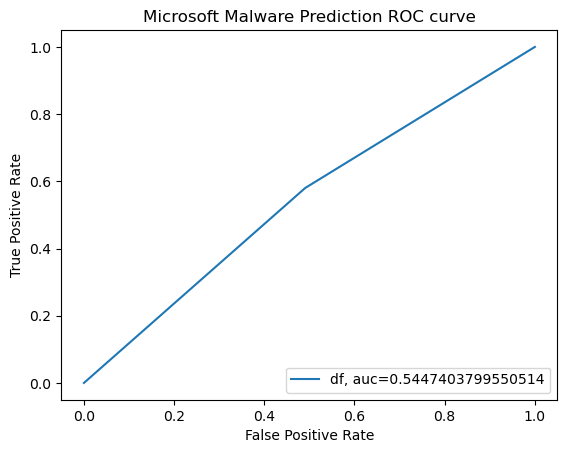

In [97]:
# Ploting my model ROC Curve
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="df, auc="+str(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Microsoft Malware Prediction ROC curve")
plt.legend(loc=4)
plt.show()

### Improving the model performance by changing the model hyperparameters

In [194]:
#Improving my model performance by hyperparameter tunning
imp_model = DecisionTreeClassifier(criterion="gini", splitter= "best", max_depth= 8, random_state=42)

In [195]:
# Traing my model
imp_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=42)

In [196]:
y_pred1 = classifier.predict(X_test)

In [197]:
imp_model.score(X_test, y_test)

0.5462

### Part2: unsupervised learning

In [243]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [200]:
df

,HasDetections,Wdft_IsGamer,Census_IsVirtualDevice,Census_HasOpticalDiskDrive,Firewall,IsProtected,Census_OSEdition_Cloud,Census_OSEdition_Core,Census_OSEdition_CoreCountrySpecific,Census_OSEdition_CoreN,...,Census_OSEdition_ServerStandardEval,OsPlatformSubRelease_prers5,OsPlatformSubRelease_rs1,OsPlatformSubRelease_rs2,OsPlatformSubRelease_rs3,OsPlatformSubRelease_rs4,OsPlatformSubRelease_th1,OsPlatformSubRelease_th2,OsPlatformSubRelease_windows7,OsPlatformSubRelease_windows8.1
0,0,0.0,0.0,0,1.0,1.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0.0,0.0,0,1.0,1.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0.0,0.0,0,1.0,1.0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,0.0,0.0,0,1.0,1.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0.0,0.0,0,1.0,1.0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,0.0,0.0,0,1.0,1.0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
99996,1,0.0,0.0,1,1.0,1.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
99997,0,0.0,0.0,0,1.0,1.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
99998,0,0.0,0.0,0,1.0,1.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [229]:
# Selecting my target columns
df_X = df.iloc[:, lambda df: [0, 4]]

In [231]:
# Getting the values of my target columns
df_values = df_X.values

In [244]:
# standardizing my target values 
scaler = StandardScaler()
X1 = scaler.fit_transform(df_values)
X1

array([[-0.99856104,  0.15147491],
       [-0.99856104,  0.15147491],
       [-0.99856104,  0.15147491],
       ...,
       [-0.99856104,  0.15147491],
       [-0.99856104,  0.15147491],
       [-0.99856104,  0.15147491]])

In [249]:
# Creating a unction to get my sum of squared distance and my kmeans inertia_
sum_of_squared_distance = []
k = range(1,15)
for k in k:
    km = KMeans(n_clusters=1, n_init="auto", random_state=42)
    km = km.fit(X1)    
    sum_of_squared_distance.append(km.inertia_)

In [250]:
km.inertia_

200000.0000000136

In [251]:
sum_of_squared_distance

[200000.0000000136,
 200000.0000000136,
 200000.0000000136,
 200000.0000000136,
 200000.0000000136,
 200000.0000000136,
 200000.0000000136,
 200000.0000000136,
 200000.0000000136,
 200000.0000000136,
 200000.0000000136,
 200000.0000000136,
 200000.0000000136,
 200000.0000000136]

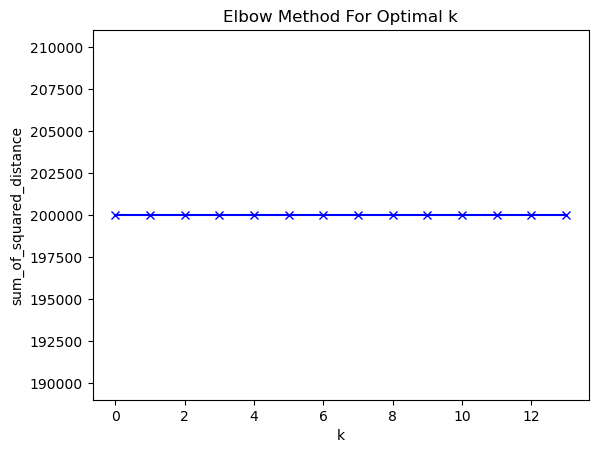

In [252]:
# Ploting elbow method graph to get number of clusters
plt.plot(sum_of_squared_distance, "bx-")
plt.xlabel("k")
plt.ylabel("sum_of_squared_distance")
plt.title("Elbow Method For Optimal k")
plt.show()

In [254]:
# Using KMean to predict my data
kmeans = KMeans(n_clusters=1, n_init="auto", init="k-means++", random_state=42)
Y = kmeans.fit_predict(X1)
print(Y)

[0 0 0 ... 0 0 0]


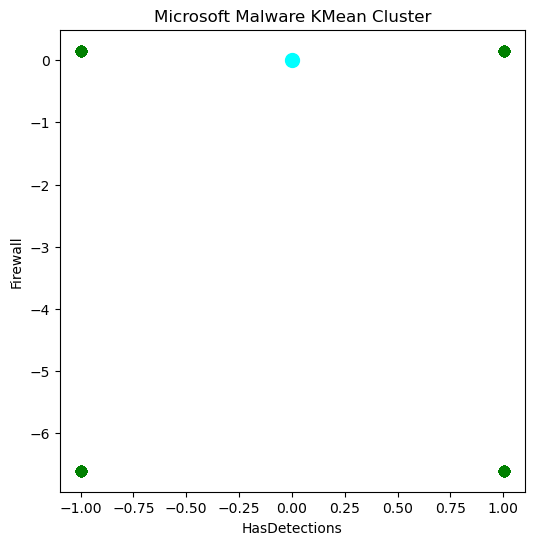

In [257]:
# Ploting the KMeans cluster graph
plt.figure(figsize=(6,6))
plt.scatter(X1[Y==0,0], X1[Y==0,1], s=50, c="green", label="Cluster 1")

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c="cyan", label="Centroids")

plt.title("Microsoft Malware KMean Cluster")
plt.xlabel("HasDetections")
plt.ylabel("Firewall");

### Interpreting the result and Conclusion
The data was standardized but there was a lot of same values hence 1 cluster was used from the elbow method.
From the data HasDetection and Firewall columns was used to fin the KMeans clusters.